In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [53]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head(3)

,Age,Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0


In [54]:
salary_data.isnull().sum()

Age           2
Experience    2
Salary        2
dtype: int64

In [55]:
for col in salary_data.columns:
    salary_data[col].fillna(salary_data[col].mode()[0], inplace=True) 

C:\Users\Durjay\AppData\Local\Temp\ipykernel_9428\3550446799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_data[col].fillna(salary_data[col].mode()[0], inplace=True)


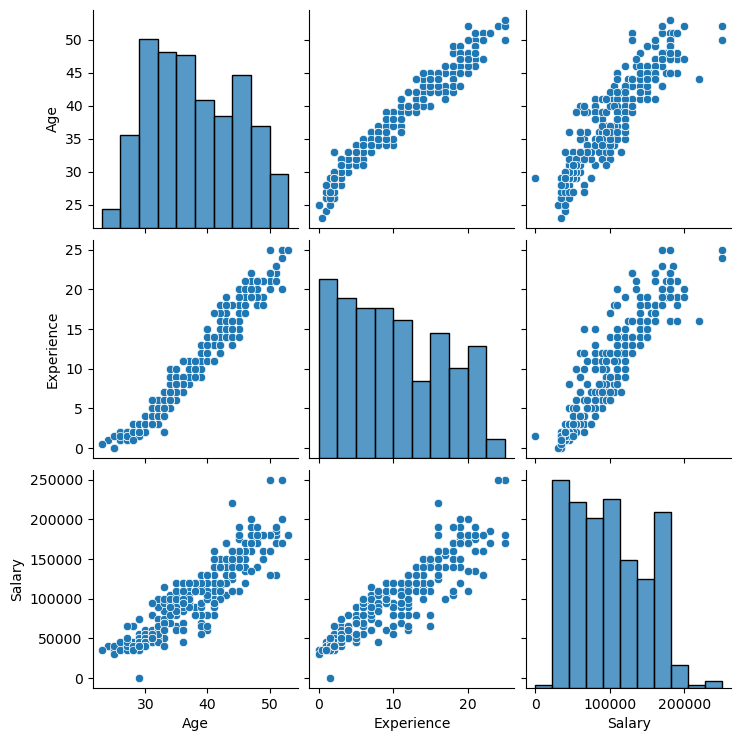

In [56]:
sns.pairplot(data=salary_data)
plt.show()

#### Even though we can use Linear Regression easily, lets use Decision tree

In [57]:
x = salary_data.iloc[:,:-1]
y = salary_data['Salary']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [59]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.8803989313528158

In [60]:
dt.score(x_test, y_test), dt.score(x_train, y_train)

(0.8803989313528158, 0.9385255036547063)

#### Lets fix the overfitting

In [61]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

dt.score(x_test, y_test), dt.score(x_train, y_train)

(0.8891613514680887, 0.8998964834943772)